In [1]:
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import cross_val_score
    from sklearn import tree
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import classification_report,confusion_matrix

    from IPython.display import Image  
    #from sklearn.externals.six import StringIO  
    from six import StringIO
    from sklearn.tree import export_graphviz
    import pydot 
except Exception as e:
    print("One of the libraries was not installed")
    print(e)
    
%matplotlib inline

In [2]:
data = pd.read_csv("../../data/data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9348 entries, 0 to 9347
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   isSpam         9348 non-null   object 
 1   isRe           9348 non-null   object 
 2   underscore     9348 non-null   object 
 3   priority       9348 non-null   object 
 4   isInReplyTo    9348 non-null   object 
 5   sortedRec      9348 non-null   object 
 6   subPunc        9348 non-null   object 
 7   multipartText  9348 non-null   object 
 8   hasImages      9348 non-null   object 
 9   isPGPsigned    9348 non-null   object 
 10  subSpamWords   9341 non-null   object 
 11  noHost         9347 non-null   object 
 12  numEnd         9348 non-null   object 
 13  isYelling      9341 non-null   object 
 14  isOrigMsg      9348 non-null   object 
 15  isDear         9348 non-null   object 
 16  isWrote        9348 non-null   object 
 17  numLines       9348 non-null   int64  
 18  bodyChar

### Converting boolean columns to right format

In [3]:
allBoolCols = data.select_dtypes(include='object').columns
allBoolCols

Index(['isSpam', 'isRe', 'underscore', 'priority', 'isInReplyTo', 'sortedRec',
       'subPunc', 'multipartText', 'hasImages', 'isPGPsigned', 'subSpamWords',
       'noHost', 'numEnd', 'isYelling', 'isOrigMsg', 'isDear', 'isWrote'],
      dtype='object')

In [4]:
for boolCol in allBoolCols:
    data = data.replace({boolCol: {'T': True, 'F': False}})
    data[boolCol] = data[boolCol].astype(bool) 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9348 entries, 0 to 9347
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   isSpam         9348 non-null   bool   
 1   isRe           9348 non-null   bool   
 2   underscore     9348 non-null   bool   
 3   priority       9348 non-null   bool   
 4   isInReplyTo    9348 non-null   bool   
 5   sortedRec      9348 non-null   bool   
 6   subPunc        9348 non-null   bool   
 7   multipartText  9348 non-null   bool   
 8   hasImages      9348 non-null   bool   
 9   isPGPsigned    9348 non-null   bool   
 10  subSpamWords   9348 non-null   bool   
 11  noHost         9348 non-null   bool   
 12  numEnd         9348 non-null   bool   
 13  isYelling      9348 non-null   bool   
 14  isOrigMsg      9348 non-null   bool   
 15  isDear         9348 non-null   bool   
 16  isWrote        9348 non-null   bool   
 17  numLines       9348 non-null   int64  
 18  bodyChar

In [6]:
data.head()

isSpam   isRe  underscore  priority  isInReplyTo  sortedRec  subPunc  \
0   False   True       False     False         True       True    False   
1   False  False       False     False        False       True    False   
2   False  False       False     False        False       True    False   
3   False  False       False     False        False       True    False   
4   False   True       False     False        False       True    False   

   multipartText  hasImages  isPGPsigned  ...  subQuesCt  numAtt  numRec  \
0          False      False        False  ...        0.0       0     2.0   
1          False      False        False  ...        0.0       0     1.0   
2          False      False        False  ...        0.0       0     1.0   
3          False      False        False  ...        0.0       0     0.0   
4          False      False        False  ...        0.0       0     1.0   

    perCaps  hour  perHTML  subBlanks  forwards  avgWordLen  numDlr  
0  4.451039    11      0.0  12.500000  0.000000    4.376623       3  
1  7.491289    11      0.0   8.000000  0.000000    4.555556       0  
2  7.436096    12      0.0   8.000000  0.000000    4.817164       0  
3  5.090909    13      0.0  18.918919  3.125000    4.714286       0  
4  6.116643    13      0.0  15.217391  6.451613    4.234940       0  

[5 rows x 30 columns]

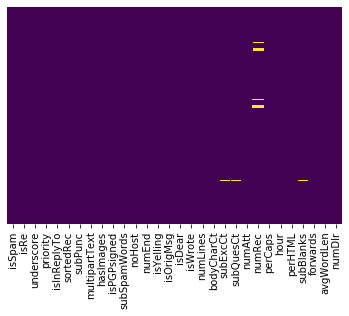

In [7]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
data.isnull().sum()

isSpam             0
isRe               0
underscore         0
priority           0
isInReplyTo        0
sortedRec          0
subPunc            0
multipartText      0
hasImages          0
isPGPsigned        0
subSpamWords       0
noHost             0
numEnd             0
isYelling          0
isOrigMsg          0
isDear             0
isWrote            0
numLines           0
bodyCharCt         0
subExcCt          20
subQuesCt         20
numAtt             0
numRec           282
perCaps            0
hour               0
perHTML            0
subBlanks         20
forwards           0
avgWordLen         0
numDlr             0
dtype: int64

In [9]:
missingCols = data.columns[data.isnull().sum() > 0]
missingCols

Index(['subExcCt', 'subQuesCt', 'numRec', 'subBlanks'], dtype='object')

In [10]:
data[missingCols].dtypes

subExcCt     float64
subQuesCt    float64
numRec       float64
subBlanks    float64
dtype: object

In [11]:
for missingCol in missingCols:
    print(missingCol)
    print(data[missingCol].unique())

subExcCt
[ 0.  1.  3.  2. nan  8.  4.  5. 42.]
subQuesCt
[ 0.  3.  1.  2.  4. nan  8. 12.  5.]
numRec
[  2.   1.   0.   3.   4.   5.   7.   6.  nan  11.  12.   8.  10.   9.
  46.  13.  15.  16.  45.  14.  19.  37.  48.  44.  30.  54.  18.  27.
  24.  47.  21.  68.  74. 311.  42.  43.  32.  34.  29.  25.  35.  23.
  28.  49.  75.  38.  17.  26.  22.  39.  36.  66.]
subBlanks
[12.5         8.         18.91891892 15.2173913  17.0212766   6.25
 11.11111111 10.63829787 14.89361702 15.55555556 17.64705882 12.
 11.86440678 12.12121212 10.         13.51351351 14.70588235 16.21621622
  9.09090909 13.46153846 14.28571429  0.          2.43902439 13.63636364
 15.38461538  5.88235294 17.07317073 13.79310345 19.04761905 17.39130435
 13.33333333  6.89655172 15.625      18.36734694 18.86792453 20.
 16.66666667 11.42857143 10.52631579 15.78947368 13.75       11.53846154
 20.83333333 20.58823529 14.58333333 14.81481481 16.36363636 11.76470588
 13.15789474 17.5        10.34482759 13.7254902  13.1147541  

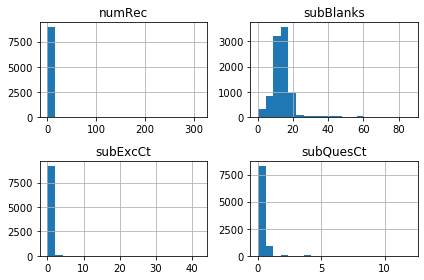

In [12]:
data[missingCols].hist(bins=20)
plt.tight_layout()

In [13]:
data[data.isnull().sum(axis=1).astype(bool)]

isSpam   isRe  underscore  priority  isInReplyTo  sortedRec  subPunc  \
1556   False  False       False     False        False       True    False   
1557   False  False       False     False         True       True    False   
1558   False  False       False     False         True       True    False   
1559   False  False       False     False         True       True    False   
1561   False  False       False     False         True       True    False   
...      ...    ...         ...       ...          ...        ...      ...   
8551    True  False        True     False        False       True    False   
8624    True  False       False     False        False       True    False   
8631    True  False       False     False        False       True    False   
8787    True  False       False     False        False       True    False   
9091    True  False       False     False        False       True    False   

      multipartText  hasImages  isPGPsigned  ...  subQuesCt  numAtt  numRec  \
1556          False      False        False  ...        0.0       0     NaN   
1557          False      False        False  ...        0.0       0     NaN   
1558          False      False        False  ...        0.0       0     NaN   
1559          False      False        False  ...        1.0       0     NaN   
1561          False      False        False  ...        1.0       0     NaN   
...             ...        ...          ...  ...        ...     ...     ...   
8551          False      False        False  ...        0.0       0     NaN   
8624          False      False        False  ...        NaN       0     1.0   
8631          False      False        False  ...        0.0       0     NaN   
8787          False      False        False  ...        NaN       0     1.0   
9091          False      False        False  ...        NaN       0     1.0   

        perCaps  hour   perHTML  subBlanks   forwards  avgWordLen  numDlr  
1556   9.326425    22   0.00000  12.903226   0.000000    4.488372       0  
1557   2.668446    22   0.00000  12.903226  48.888889    4.118132       0  
1558  10.000000    22   0.00000  12.903226  28.571429    4.054054       0  
1559   2.878465     2   0.00000   9.090909   9.090909    3.991489       0  
1561   3.596560     2   0.00000   9.090909   0.000000    4.099359       0  
...         ...   ...       ...        ...        ...         ...     ...  
8551   6.771263    14  33.35946  14.634150   0.000000    3.755039       0  
8624   6.995885    13   0.00000        NaN   0.000000    5.885813       0  
8631   6.265256    18  35.09799  16.666670   0.000000    3.657738       0  
8787  14.901050    22   0.00000        NaN   0.000000    4.585409       2  
9091   4.038174    10  11.05807        NaN   0.000000    4.324256       0  

[302 rows x 30 columns]

In [14]:
# TODO: We can impute the missing values, but we should be careful since some of them have been loaded as float, but should really be int
# For now, I will just remove them

In [15]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9046 entries, 0 to 9347
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   isSpam         9046 non-null   bool   
 1   isRe           9046 non-null   bool   
 2   underscore     9046 non-null   bool   
 3   priority       9046 non-null   bool   
 4   isInReplyTo    9046 non-null   bool   
 5   sortedRec      9046 non-null   bool   
 6   subPunc        9046 non-null   bool   
 7   multipartText  9046 non-null   bool   
 8   hasImages      9046 non-null   bool   
 9   isPGPsigned    9046 non-null   bool   
 10  subSpamWords   9046 non-null   bool   
 11  noHost         9046 non-null   bool   
 12  numEnd         9046 non-null   bool   
 13  isYelling      9046 non-null   bool   
 14  isOrigMsg      9046 non-null   bool   
 15  isDear         9046 non-null   bool   
 16  isWrote        9046 non-null   bool   
 17  numLines       9046 non-null   int64  
 18  bodyChar

In [16]:
# Takes a long time
# sns.pairplot(data, hue='isSpam', palette='Set1')

### Train Test Split

In [17]:
X = data.drop('isSpam',axis=1)
y = data['isSpam']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Decision Trees

In [19]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
predictions = dtree.predict(X_test)

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.97      0.98      0.98      1350
        True       0.95      0.92      0.93       460

    accuracy                           0.97      1810
   macro avg       0.96      0.95      0.96      1810
weighted avg       0.97      0.97      0.97      1810



In [22]:
print(confusion_matrix(y_test,predictions))

[[1326   24]
 [  37  423]]


### Tree Visualization

In [23]:
features = list(data.columns[1:])
print(features)

['isRe', 'underscore', 'priority', 'isInReplyTo', 'sortedRec', 'subPunc', 'multipartText', 'hasImages', 'isPGPsigned', 'subSpamWords', 'noHost', 'numEnd', 'isYelling', 'isOrigMsg', 'isDear', 'isWrote', 'numLines', 'bodyCharCt', 'subExcCt', 'subQuesCt', 'numAtt', 'numRec', 'perCaps', 'hour', 'perHTML', 'subBlanks', 'forwards', 'avgWordLen', 'numDlr']


In [24]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())
# plt.savefig('output.png', dpi=300)

In [25]:
# dotfile = open("./tree.dot", 'w')
# tree.export_graphviz(dtree, out_file = dotfile, feature_names = features)
# dotfile.close()

### Hyperparameter Optimization

In [26]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args

In [27]:
# ?DecisionTreeClassifier

# criterion='gini',
# splitter='best',
# max_depth=None,
# min_samples_split=2,
# min_samples_leaf=1,
# min_weight_fraction_leaf=0.0,
# max_features=None,
# random_state=None,
# max_leaf_nodes=None,
# min_impurity_decrease=0.0,
# min_impurity_split=None,
# class_weight=None,
# presort='deprecated',
# ccp_alpha=0.0,

In [74]:
n_features = X_train.shape[1]

space  = [
    Integer(1, 100, name='max_depth'),
    Integer(1, n_features, name='max_features'),
    Real(0, 1, name='ccp_alpha'),
    Integer(2, 100, name='min_samples_split'),
    Integer(1, 100, name='min_samples_leaf')
]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set
# scikit-learn estimator parameters
@use_named_args(space)
def objective(**params):
    dtree = DecisionTreeClassifier()
    dtree.set_params(**params)
    return -np.mean(cross_val_score(dtree, X_train, y_train, cv=3, n_jobs=-1, scoring="f1"))

In [75]:
# ?gp_minimize

In [76]:
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=42)

In [77]:
# Best Parameters
print(f"Best Score (f1): {round(-res_gp.fun,2)}")
print("Best Parameters:")
for i in np.arange(0,len(space)):
    print(f"\t{space[i].name}: {res_gp.x[i]}")

Best Score (f1): 0.9
Best Parameters:
	max_depth: 67
	max_features: 29
	ccp_alpha: 0.0
	min_samples_split: 2
	min_samples_leaf: 1


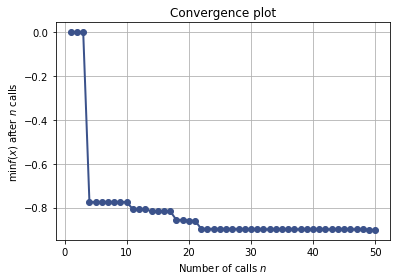

In [78]:
from skopt.plots import plot_convergence
plot_convergence(res_gp)

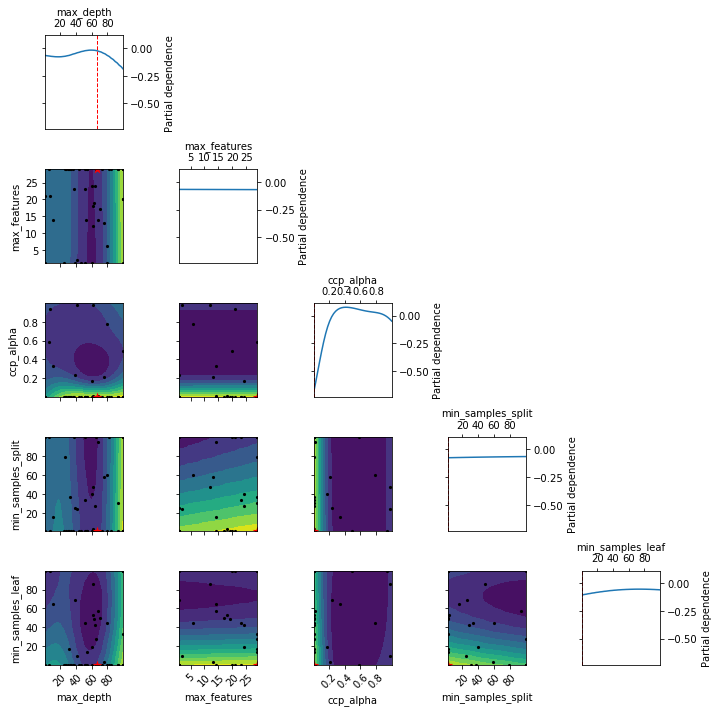

In [79]:
from skopt.plots import plot_objective
plot_objective(res_gp)
plt.tight_layout()

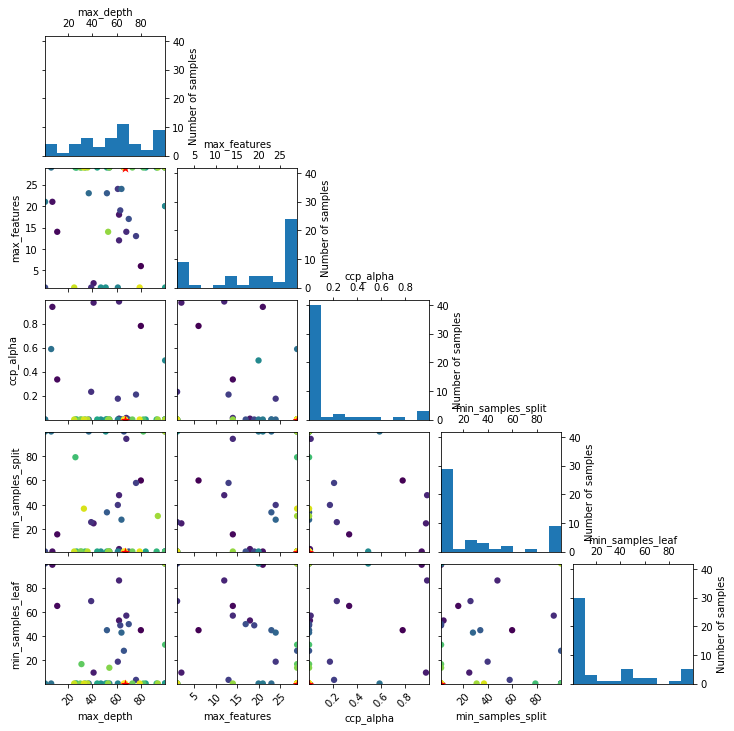

In [81]:
from skopt.plots import plot_evaluations
_ = plot_evaluations(res_gp, bins=10)